# Fiche01

On prend $A=\begin{pmatrix}4&1&2\\ 1&5&3\\ 2&3&6 \end{pmatrix}$           

elle est symétrique définie positive, on veut calculer ses valeurs propres $\lambda_1,\lambda_2,\lambda_3$               
puis représenter la fonction $f(\alpha):\mathbb R\longrightarrow \max([1-\alpha \lambda_1|,|1-\alpha \lambda_n|)$

In [3]:
%display latex

### Ecriture de la matrice

In [4]:
A=matrix([[4,1,2],
          [1,5,3],
          [2,3,6]])


In [5]:
if(A==A.transpose()):
    print("la matrice est symétrique")

la matrice est symétrique


### Calcul des valeurs propres

In [6]:
valeurs_propres = A.eigenvalues()

if(valeurs_propres>[0,0,0]):
    print("les valeurs propres sont positives")

les valeurs propres sont positives


On en déduit que $A$ est bien définie positive 

## Ecriture de la fonction

In [7]:
lambda_1=min(valeurs_propres)
lambda_3=max(valeurs_propres)

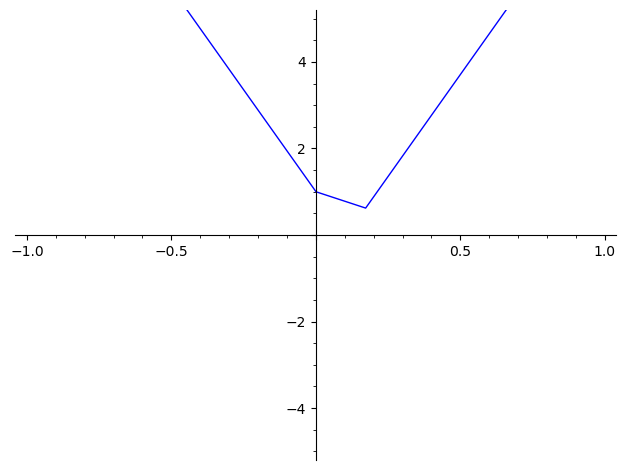

In [8]:
var('alpha')
def phi(alpha):
    return max(abs(1-alpha*lambda_1),abs(1-alpha*lambda_3))

plot(phi,(alpha,-1,1),
    ymin=-5,ymax=5)

# Méthode du gradient 

## Choix d'un second membre, calcul de la solution sur sage 


On choisit un second membre $b=\begin{pmatrix} 1\\3\\2 \end{pmatrix}$

In [18]:
b=vector([1,3,2])

Ob calcule la solution qu'on va comparer avec la suite de la méthode du gradient 

In [19]:
x_sol=A.solve_right(b)

print(x_sol)

(1/10, 4/7, 1/70)


On vérifie, au cas où, la solution : 

In [20]:
A*x-b

(0, 0, 0)

la solution marche bel et bien.

## Ecriture de la suite

choix du pas constant et calcul de la suite
on a déterminé que le meilleur choix de pas constant est $\alpha=\frac 2{\lambda_n}$ avec $\lambda_n $ la valeur propre de $A$ la plus grande

In [21]:
pas=2/lambda_3

In [22]:
def gradient(A,b,n):
    if(n==0):
        x=vector([1,1,1])
        return x
    else:
        x=gradient(A,b,n-1)
        return x+pas*(b-A*x)

In [28]:
for i in [10,20,50,100]:
    print(x_sol-gradient(A,b,i))

(-0.486494906?, -0.750294374?, -0.943064339?)
(-0.5?, -1.?, -1.?)
(0.?e26, 0.?e26, 0.?e26)
(0.?e70, 0.?e70, 0.?e70)


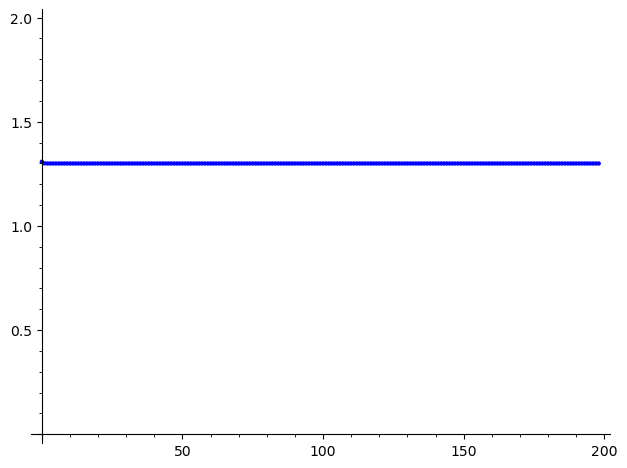

In [34]:
def erreur_gradient(A,b,n):
    erreur=gradient(A,b,n)-x_sol
    norme_erreur=erreur.norm()
    return norme_erreur

points=[]
for i in range(1,200):
    points.append(erreur_gradient(A,b,i))

list_plot(points,plotjoined=False, marker='o', color='blue',
         ymin=0,ymax=2)

# Fiche 01 : Plus général

On cherche à appliquer la méthode du gradient avec $A$ symétrique définie positive peu importe la dimension.           
On commence par une simple fonction pour vérifier que la matrice est bien symétrique définie positive puis on écrira la fonction de la méthode du gradient :

In [35]:
def verif(A):
    va_propres=A.eigenvalues()
    positif=True
    for e in va_propres:
        if e<=0:
            positif=False
    if A==A.transpose() and positif:
        return True
    else:
        return False 

On continue avec une fonction qui fait la méthode du gradient à pas constant 

In [36]:
def Gradient(A,b,n):
    va_max = max(A.eigenvalues())
    if(n==0):
        dim=A.nrows()  #récupérer la dimension de la matrice
        x=vector(1 for _ in range(dim))
        return x
    else:
        pas=2/va_max
        x=gradient(A,b,n-1)
        return x-pas*(b-A*x)